### Image Classification Part III

Cats vs. Dogs Dataset: https://www.kaggle.com/c/dogs-vs-cats/data

In [1]:
import keras 
from keras.layers import Flatten, Conv2D, MaxPool2D, Dense 
from keras.models import Sequential 
from tensorflow.keras.utils import to_categorical 
from keras_preprocessing.image import ImageDataGenerator

In [2]:
# import tensorflow as tf
# device_name = tf.test.gpu_device_name()
# if device_name != '/device:GPU:0':
#   raise SystemError('GPU device not found')
# print('Found GPU at: {}'.format(device_name))

In [3]:
!ls

drive  sample_data


In [4]:
!ls drive/MyDrive/small/

train  val


In [5]:
path_to_image = 'drive/MyDrive/small/train/dogs_train/dog.10236.jpg'

In [6]:
import matplotlib.pyplot as plt

In [7]:
sample_dog = plt.imread(path_to_image)

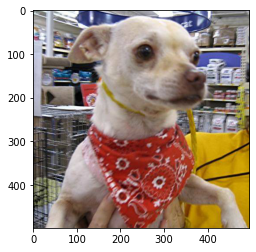

In [8]:
plt.imshow(sample_dog)

### Read in Images and Train a ANN

In [9]:
from keras_preprocessing.image import ImageDataGenerator

In [10]:
train_image_datagenerator = ImageDataGenerator(rescale=1/255.)

In [11]:
train_data = train_image_datagenerator.flow_from_directory('drive/MyDrive/small/train/',
                                              target_size = (150, 150))

Found 2163 images belonging to 2 classes.


In [12]:
from keras.models import Sequential

In [22]:
network_1 = Sequential()
network_1.add(Flatten())
network_1.add(Dense(100, activation = 'relu'))
network_1.add(Dense(1, activation = 'sigmoid')) #for any binary classification

In [23]:
network_1.compile(loss = 'bce', metrics = ['acc'])

In [24]:
network_1.fit(train_data)

68/68 [==============================] - 10s 144ms/step - loss: 9.4752 - acc: 0.5000


In [25]:
network_2 = Sequential()
network_2.add(Conv2D(16, (3, 3), activation = 'relu'))
network_2.add(MaxPool2D((2, 2)))
network_2.add(Conv2D(20, (3, 3), activation = 'relu'))
network_2.add(MaxPool2D((2, 2)))
network_2.add(Flatten())
network_2.add(Dense(100, activation = 'relu'))
network_2.add(Dense(1, activation = 'sigmoid'))

In [26]:
network_2.compile(loss='bce', metrics = ['acc'])

In [27]:
network_2.fit(train_data, batch_size=24)

68/68 [==============================] - 11s 146ms/step - loss: 0.9838 - acc: 0.5000


In [28]:
train_gen = ImageDataGenerator(rescale = 1/255,
                               shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True)

In [29]:
train_data_aug = train_gen.flow_from_directory('drive/MyDrive/small/train/', 
                                               target_size = (150, 150))

Found 2163 images belonging to 2 classes.


In [30]:
network_2 = Sequential()
network_2.add(Conv2D(32, (3, 3), activation = 'relu'))
network_2.add(MaxPool2D((2, 2)))
network_2.add(Flatten())
network_2.add(Dense(100, activation = 'relu'))
network_2.add(Dense(1, activation = 'sigmoid'))
network_2.compile(loss='bce', metrics = ['acc'])

In [ ]:
network_2.fit(train_data_aug, epochs=10)

Epoch 1/10
68/68 [==============================] - 20s 290ms/step - loss: 2.0972 - acc: 0.5000
Epoch 2/10
68/68 [==============================] - 21s 313ms/step - loss: 0.6931 - acc: 0.5000
Epoch 3/10
68/68 [==============================] - 20s 293ms/step - loss: 0.6931 - acc: 0.5000
Epoch 4/10
68/68 [==============================] - 20s 292ms/step - loss: 0.6931 - acc: 0.5000
Epoch 5/10
68/68 [==============================] - 20s 291ms/step - loss: 0.6931 - acc: 0.5000
Epoch 6/10
68/68 [==============================] - 20s 296ms/step - loss: 0.6931 - acc: 0.5000
Epoch 7/10
68/68 [==============================] - 20s 298ms/step - loss: 0.6931 - acc: 0.5000
Epoch 8/10
68/68 [==============================] - 20s 297ms/step - loss: 0.6931 - acc: 0.5000
Epoch 9/10
49/68 [====================>.........] - ETA: 5s - loss: 0.6931 - acc: 0.5000

### Transfer Learning: Use somebody elses neural net!

In [ ]:
from tensorflow.keras.applications import InceptionV3

In [ ]:
conv_base = InceptionV3(include_top=False, input_shape = (150, 150, 3))

In [ ]:
from tensorflow.keras.utils import plot_model

In [ ]:
train_gen = ImageDataGenerator(rescale = 1/255,
                               shear_range=0.1,
                                zoom_range=0.2,
                                horizontal_flip=True)

train_data_aug = train_gen.flow_from_directory('drive/MyDrive/doggos/small/train/', 
                                               target_size = (150, 150), class_mode = None)

In [ ]:
plot_model(conv_base)

In [ ]:
preds = conv_base.predict(train_data_aug)

In [ ]:
preds.shape

In [ ]:
#for our top layer we have to unpack y_train
y_train = train_data_aug.labels

In [ ]:
y_train_bin = to_categorical(y_train)

In [ ]:
from keras.layers import GlobalAveragePooling2D

In [ ]:
top_layer = Sequential()
top_layer.add(GlobalAveragePooling2D())
top_layer.add(Dense(2, activation = 'softmax'))
top_layer.compile(loss = 'categorical_crossentropy', metrics = ['acc'])

In [ ]:
history = top_layer.fit(preds, y_train_bin, epochs=100, verbose = 0)

In [ ]:
plt.plot(history.history['acc'])

In [ ]:
history.history['acc'][-1]